### Bibliotecas

In [1]:
# Instalação manual de bibliotecas
!pip install numpy matplotlib pandas seaborn
# Bibliotecas
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb


# WARNING: N entendi o que baixar na 3C TODO ver isso depois
# CUDA. Lindo. Isso vai ser divertido: https://github.com/CannyLab/tsne-cuda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.2/61.2 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 152.4/152.4 kB 5.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 341.8/341.8 kB 11.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 28.6 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 28.9 MB/s eta 0:00:00m eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.2/12.2 MB 29.4 MB/s eta 0:00:00m eta 0:00:010:0101
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 302.8/302.8 kB 26.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.8/4.8 MB 30.0 MB/s eta 0:00:00 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 28.8 MB/s eta 0:00:00 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.6/3.6 MB 29.9 MB/s eta 0:00:0031m33.3 MB/s eta 0:00:01
   ━━━━━

# 1) Dada a base de dados Haberman's Survival (disponibilizada em http://archive.ics.uci.edu/dataset/43/haberman+s+survival), obtenha:

Leitura dos dados

In [285]:

#Faz a leitura do arquivo com os dados
#header = None --> o arquivo não tem cabeçalho
#names --> coloca nomes para cada coluna
data = pd.read_csv('data/haberman.data', header = None, names = ['age', 'op_year', 'pos_nodes', 'survived'])
data.head()
# data.describe()

,age,op_year,pos_nodes,survived
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


## a) A média e variância de cada um dos atributos;

In [286]:
# seleciona apenas atributos de entrada
faixa = np.arange(0,3)
print(faixa)

[0 1 2]


In [287]:
# Imprime média e variância de cada atributo
print('Média')
print(data.iloc[:,faixa].mean())

print('\r\nVariância')
print(data.iloc[:,faixa].var())

Média
age          52.457516
op_year      62.852941
pos_nodes     4.026144
dtype: float64

Variância
age          116.714583
op_year       10.558631
pos_nodes     51.691118
dtype: float64


## b) A média e variância de cada um dos atributos para cada uma das classes;

In [288]:
# Como pegar atributos filtrados por classe
# Extrai todos os valores únicos e os coloca num vetor
classes = data['survived'].unique()
# 1 = the patient survived 5 years or longer
# 2 = the patient died within 5 year
print(classes)

for i in range(0,classes.size):
    data_select = data[data['survived'] == classes[i]]
    print(f"Média 'survived' == {classes[i]}\n")
    print(data_select.iloc[:,faixa].mean())
    print("\n")
    print(f"Variância 'survived' == {classes[i]}\n")
    print(data_select.iloc[:,faixa].var())
    print("\n\n")


[1 2]
Média 'survived' == 1

age          52.017778
op_year      62.862222
pos_nodes     2.791111
dtype: float64


Variância 'survived' == 1

age          121.267540
op_year       10.387183
pos_nodes     34.460635
dtype: float64



Média 'survived' == 2

age          53.679012
op_year      62.827160
pos_nodes     7.456790
dtype: float64


Variância 'survived' == 2

age          103.370679
op_year       11.169753
pos_nodes     84.376235
dtype: float64





## c) A matriz de coeficientes de correlação;

In [289]:
#Usamos numpy para realizar os cálculos
eigValues, eigVectors = np.linalg.eig(data.iloc[:,faixa].corr())
print(f" {eigValues}")
print()
print(eigVectors)


 [1.11137003 0.89217623 0.99645374]

[[ 0.70131829  0.71275488  0.01153822]
 [ 0.57789155 -0.57794675  0.57621082]
 [-0.41736555  0.39743934  0.81721965]]


## d) O histograma com 8 bins de cada um dos atributos para cada uma das classes (gere gráficos dos histogramas com cores diferentes para cada classe)

classes[0] => survived
classes[1] => not survived


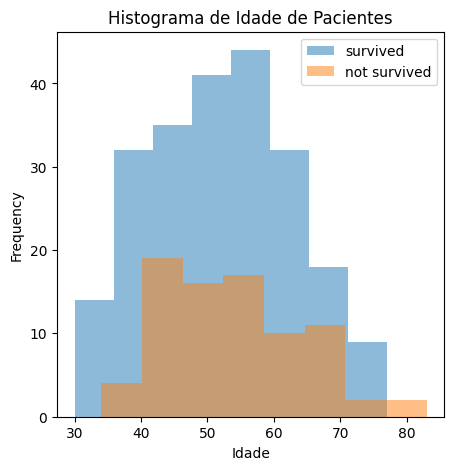

In [290]:
# Tamanho das janelas
xsize = 5
ysize = 5

# Imprime os histogramas
print('classes[0] => survived')
print('classes[1] => not survived')

# Títulos e labels de figura
figlabels = {
    "xlabel":"Idade", 
    "title":"Histograma de Idade de Pacientes"
}

# legenda
legend = ['survived', 'not survived']

# Cria o canvas
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# -- AGE --
# slice = pd.DataFrame()
# slice['survived'] = data[data['survived'] == classes[0]].iloc[:,0]
# slice['not-survived'] = data[data['survived'] == classes[1]].iloc[:,0]

# slice.plot.hist(bins=8, alpha=0.5, **figlabels)

# # survived
data[data['survived'] == classes[0]].iloc[:,0].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,0].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

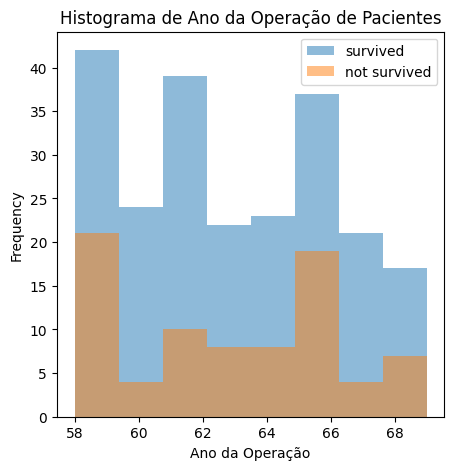

In [291]:

# -- OP_YEAR --
# Títulos e labels de figura

figlabels = {
    "xlabel":"Ano da Operação", 
    "title":"Histograma de Ano da Operação de Pacientes"
}

# Cria o canvas
# fig2 = plt.figure(figsize=(xsize,ysize))
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# # survived
data[data['survived'] == classes[0]].iloc[:,1].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,1].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

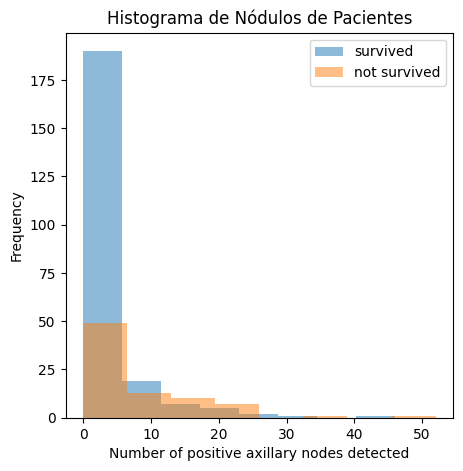

In [292]:
# -- pos_nodes --
# Títulos e labels de figura

figlabels = {
    "xlabel":"Number of positive axillary nodes detected", 
    "title":"Histograma de Nódulos de Pacientes"
}

# Cria o canvas
# fig3 = plt.figure(figsize=(10,10))
fig = plt.figure(figsize=(xsize,ysize))
ax = fig.add_subplot()

# # survived
data[data['survived'] == classes[0]].iloc[:,2].plot.hist(bins=8, alpha=0.5)
# # not survived
data[data['survived'] == classes[1]].iloc[:,2].plot.hist(bins=8, alpha=0.5, **figlabels)

ax.legend(legend)

## e) Gere um gráfico 3D das amostras, identificando cada classe. Analise o gráfico e informe se a tarefa de classificação é fácil ou difícil e justifique a sua resposta.


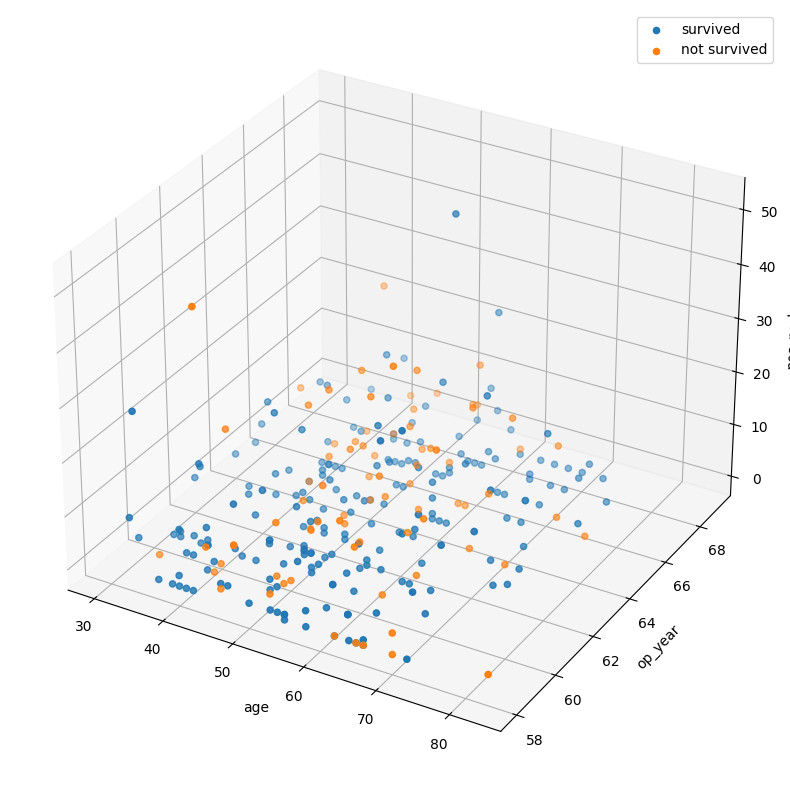

In [293]:
# Visualização 3D

# cria o canvas 3d
fig = plt.figure(figsize=(10,10))
ax = fig.add_subplot(projection='3d')

colors = ['tab:blue' ,'tab:orange']

ax.set_xlabel('age')
ax.set_ylabel('op_year')
ax.set_zlabel('pos_nodes')

for i in range(0,classes.size):
    data_select = data[data['survived'] == classes[i]]
    ax.scatter(data_select['age'], data_select['op_year'], data_select['pos_nodes'], marker='o', c=colors[i])

ax.legend(legend)

plt.show()

A tarefa de classificação é difícil, pois não há correlação clara de agrupamento entre os vaores dos parâmetros e a classe de cada amostra. As amostras de sobreviventes e de não sobreviventes estão misturadas.

# 2) Para a base de dados Car Evaluation, calcule a informação mútua entre os atributos de entrada (as 5 primeiras colunas) e o atributo de saída (a última coluna). Informe os resultados e comente a sua solução.

In [2]:
## Leitura inicial
data = pd.read_csv('data/car.data', header = None, names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'])

data.head()

,buying,maint,doors,persons,lug_boot,safety
vhigh,vhigh,2,2,small,low,unacc
vhigh,vhigh,2,2,small,med,unacc
vhigh,vhigh,2,2,small,high,unacc
vhigh,vhigh,2,2,med,low,unacc
vhigh,vhigh,2,2,med,med,unacc


# 3) Dada a base de dados CNAE_9_reduzido (em anexo):



## a) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes. O rótulo das amostras está na primeira coluna. Essa coluna não deve ser usada no PCA). Pode usar a função eig do Matlab ou do Python. 


## b) gere um gráfico 2D com os dois componentes principais (uso de PCA) das amostras, identificando cada classe (a base possui 5 classes). Para este gráfico realize o branqueamento dos dados (isto é, após a aplicação do PCA garantir que a matriz de covariância dos dados seja uma matriz identidade). O que tem de diferente entre os gráficos de a) e b)?

## c) gere um gráfico 2D usando o t-SNE (pode usar o código disponível em https://lvdmaaten.github.io/tsne/ com os parâmetros default), identificando cada classe (a base possui 5 classes). Lembre-se de não usar a coluna de rótulos para obter a redução de dimensão.

## d) Utilize as primeiras 480 amostras para treinar o classificador vizinho mais próximo (NN) (utilize a distância Euclidiana) e as demais 120 para teste. Calcule a métrica acurácia e
informe o valor obtido. Pelo resultado obtido, qual dos gráficos (t-SNE ou PCA) você acha que melhor representou a “realidade” da distribuição dos dados? Por quê?